# Employee Performance Analysis 

## INX Future Inc. 

In [1]:
#Import the data Analysis and Visualization Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb

#Import the data preprocessing libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score # Performing cross validation to test whether we have a good model or an over fit one.
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Import Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, accuracy_score


#Handling warnings
import warnings
warnings.filterwarnings("ignore")


## Data Loading and Inspection

In [2]:
#Loading the dataset

df = pd.read_excel('Employees Data.xlsx')


#Display the first 5 values of the dataset to have an overview on the overal data

df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
# Inspect the dataset and explore its characteristics before we proceed to processing

print("Dataset Overview \n")
print(f"{df.info()} \n")
df.head(5) #And display the first 5 rows of the dataset

Dataset Overview 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13 

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
#Investigating data for any missing values
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

The data is clean with no missing values

## Department-wise Performance Analysis and Visualization

1. We shall explore the Departmental performance rating using the boxplot

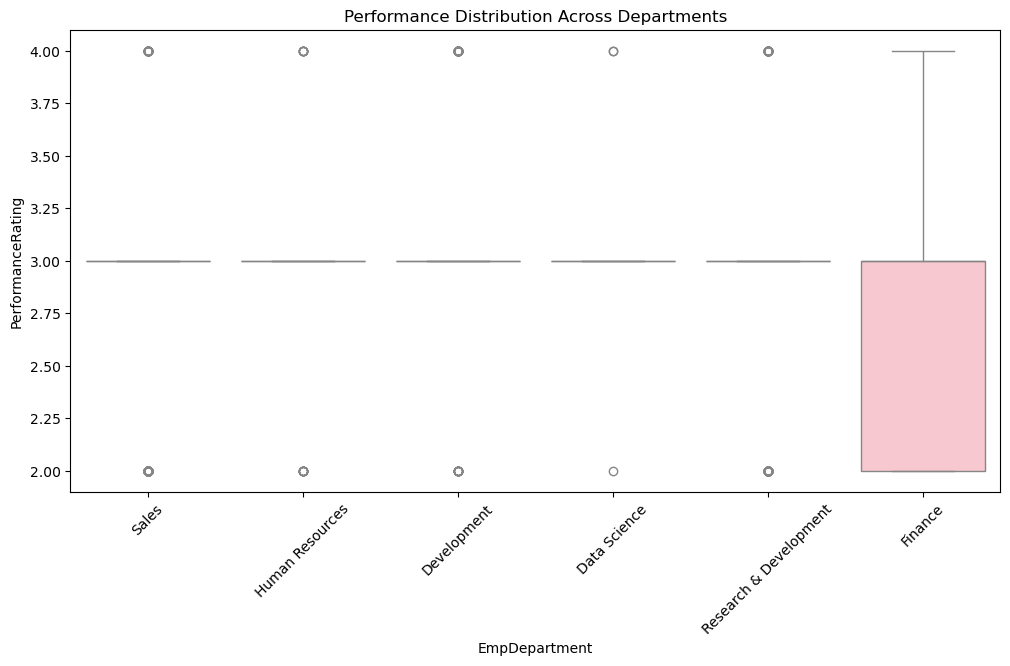

In [5]:
# 1. Department-wise Performance Analysis using the box plot which will help us to easily detect outliers

plt.figure(figsize=(12, 6))
sns.boxplot(x='EmpDepartment', y='PerformanceRating', data=df, color = 'pink')
plt.xticks(rotation=45)
plt.title('Performance Distribution Across Departments')
plt.show()


Across departments, the median performance rating is consistently 3.0, with all groups displaying both high (4.0) and low (2.0) ratings, though these outliers are less common. Notably, while most departments exhibit a fairly uniform distribution of ratings, the Finance department shows greater variability, indicating potential areas that might require additional attention. Overall, the performance rating system appears standardized, with the majority of employees clustering around the median score. However, the Finance department’s higher rating fluctuations shows that the department it may require further attention to understand and address the performance disparities.

 2. A quick overview of Departmental performance at a glance across all the Performance Ratings

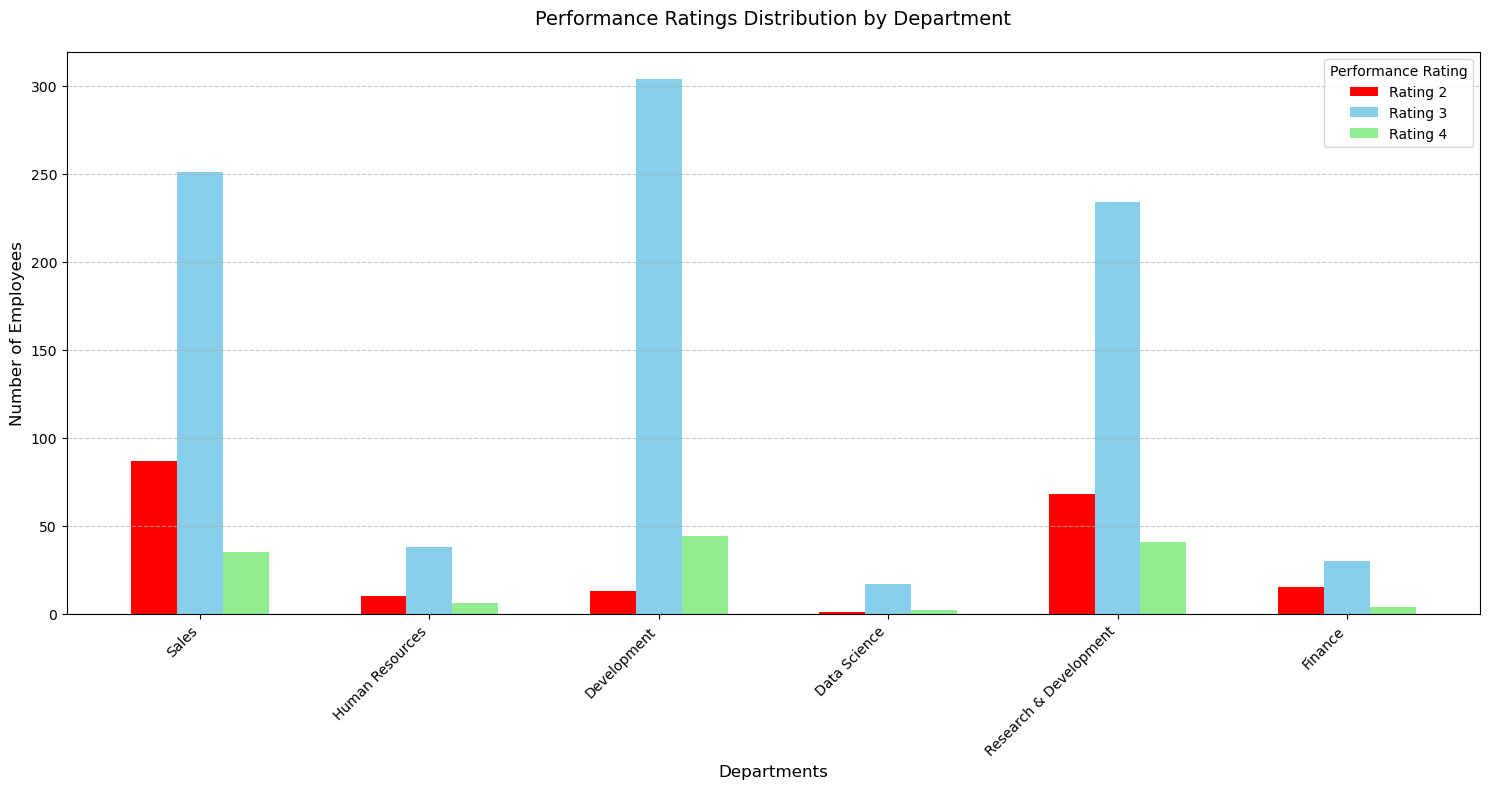

In [6]:
# We shall visualise using the histogram

# Create grouped bar chart
plt.figure(figsize=(15, 8))
departments = df['EmpDepartment'].unique() #Setting unique values for the department
ratings = sorted(df['PerformanceRating'].unique()) #Setting unique values for the performance rates

# Set position of bar on X axis
bar_width = 0.2
positions = np.arange(len(departments))

# Colors for different ratings
colors = ['red', 'skyblue', 'lightgreen'] # Red, Skyblue, Light green

# Plotting separate bars for each rating
for idx, rating in enumerate(ratings):
    counts = [len(df[(df['EmpDepartment'] == dept) & (df['PerformanceRating'] == rating)]) 
             for dept in departments]
    plt.bar(positions + (idx * bar_width), 
            counts, 
            bar_width, 
            label=f'Rating {rating}',
            color=colors[idx])

# Customize the plot
plt.xlabel('Departments', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.title('Performance Ratings Distribution by Department', fontsize=14, pad=20)

# Set x-axis labels
plt.xticks(positions + bar_width * (len(ratings)-1)/2, departments, rotation=45, ha='right')

# Add legend
plt.legend(title='Performance Rating')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


 3. Average Performance per department

In [7]:
# Calculating the average performance by department
dept_performance = df.groupby('EmpDepartment')['PerformanceRating'].agg(['mean', 'count']).round(2)
print("\nDepartment-wise Performance Summary:")
dept_performance


Department-wise Performance Summary:


,mean,count
EmpDepartment,,
Data Science,3.05,20
Development,3.09,361
Finance,2.78,49
Human Resources,2.93,54
Research & Development,2.92,343
Sales,2.86,373


In [8]:
# Calculating the number of employees by department
dept_distribution = df.groupby('EmpDepartment')['EmpNumber'].agg('count').round(2)
print("\n Number of Staff per Department:")
print("__" *20)
print(dept_distribution)


 Number of Staff per Department:
________________________________________
EmpDepartment
Data Science               20
Development               361
Finance                    49
Human Resources            54
Research & Development    343
Sales                     373
Name: EmpNumber, dtype: int64


 4. Further Visuals to visualise the distribution of the performance Ratings

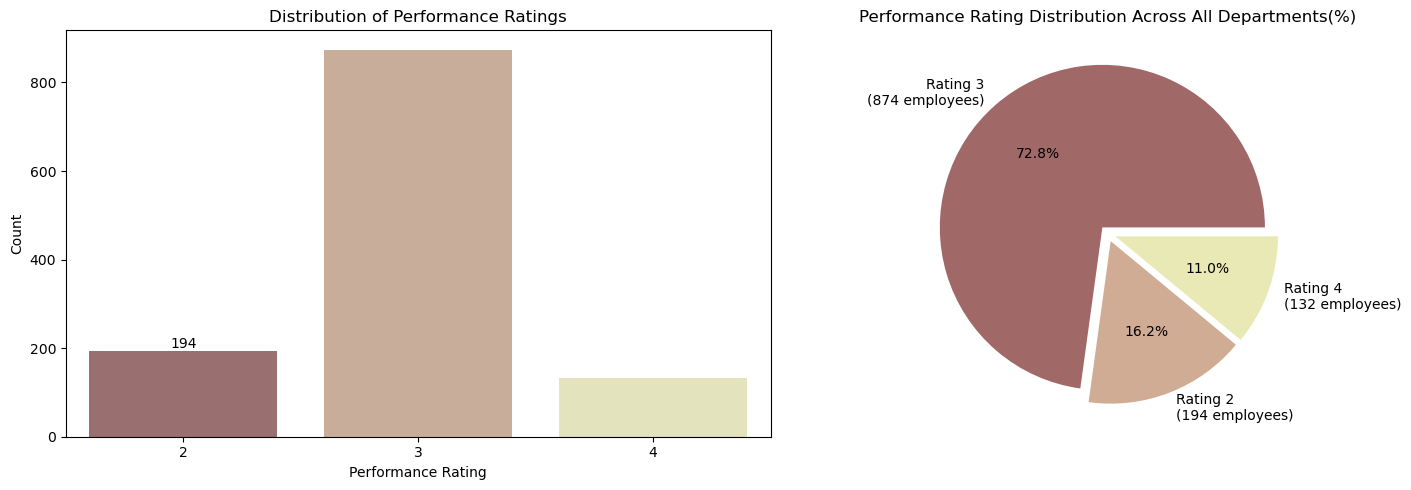


Performance Rating Distribution Summary:
----------------------------------------
PerformanceRating
2    194
3    874
4    132
Name: count, dtype: int64

Percentage Distribution:
----------------------------------------
PerformanceRating
2    16.2
3    72.8
4    11.0
Name: proportion, dtype: float64 %


In [9]:
# Create figure with two subplots
plt.figure(figsize=(15, 5))

# 1. Using the Bar Plot
plt.subplot(1, 2, 1) #The first figure
sns.countplot(data=df, x='PerformanceRating', palette='pink')
plt.title('Distribution of Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Count')

# Add count labels on top of bars
for i in plt.gca().containers[0]:
    plt.gca().text(i.get_x() + i.get_width()/2, 
                  i.get_height(), 
                  str(int(i.get_height())), 
                  ha='center', va='bottom')

# 2. Using the Pie Chart
plt.subplot(1, 2, 2) #The second figure
rating_counts = df['PerformanceRating'].value_counts()
plt.pie(rating_counts, 
        labels=[f'Rating {r}\n({c} employees)' for r, c in rating_counts.items()],
        autopct='%1.1f%%',
        colors=sns.color_palette('pink', n_colors=len(rating_counts)),
        explode=[0.05] * len(rating_counts))
plt.title('Performance Rating Distribution Across All Departments(%)')

plt.tight_layout()
plt.show()


# Print summary statistics
print("\nPerformance Rating Distribution Summary:")
print("-" * 40)
print(df['PerformanceRating'].value_counts().sort_index())
print("\nPercentage Distribution:")
print("-" * 40)
print(df['PerformanceRating'].value_counts(normalize=True).sort_index().multiply(100).round(1), "%")

<Figure size 1500x600 with 0 Axes>

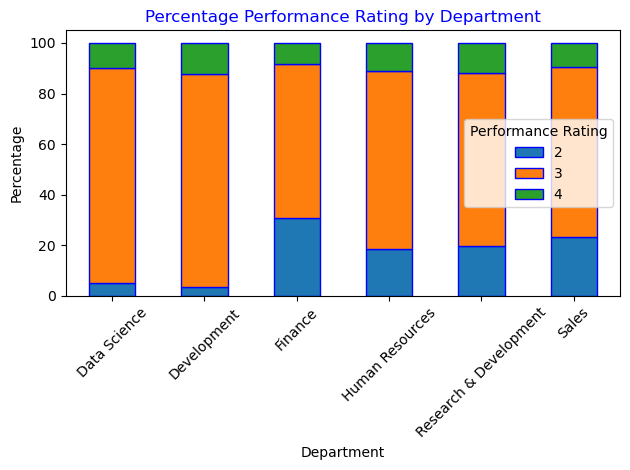

<Figure size 1500x600 with 0 Axes>

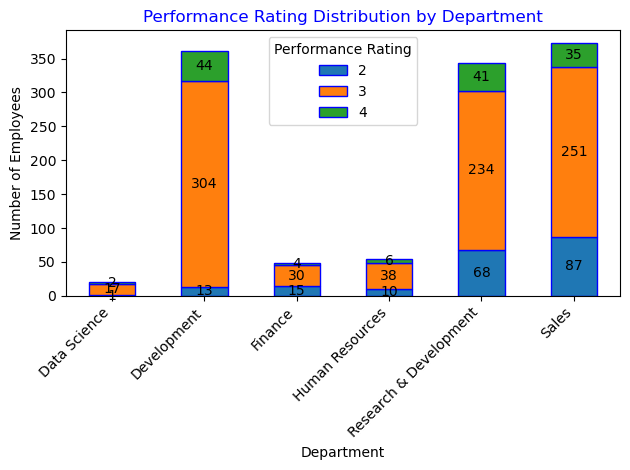

In [10]:

#Figure number 1
#The first stacked bar
plt.figure(figsize=(15, 6))
dept_perf = pd.crosstab(df['EmpDepartment'], df['PerformanceRating'], normalize='index') * 100
dept_perf.plot(kind='bar', stacked=True, edgecolor = 'blue')
plt.title('Percentage Performance Rating by Department', color = 'blue')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.legend(title='Performance Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Figure number 2
plt.figure(figsize=(15, 6))

# Create crosstab with raw counts (removed normalize parameter)
dept_perf = pd.crosstab(df['EmpDepartment'], df['PerformanceRating'])

# Create stacked bar plot
dept_perf.plot(kind='bar', stacked=True, edgecolor= 'blue')
plt.title('Performance Rating Distribution by Department', color = 'blue')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Rating')
plt.xticks(rotation=45, ha='right')  # ha='right' for better label alignment

# Add value labels on the bars
for c in plt.gca().containers:
    # Add labels
    plt.bar_label(c, label_type='center')

plt.tight_layout()
plt.show()


 5. Further Visuals to visualise the distribution of the performance Ratings with pivot tables

In [11]:
# Create pivot table
performance_pivot = pd.pivot_table(df, 
                                 values='EmpNumber',  # Count employees
                                 index='EmpDepartment',
                                 columns='PerformanceRating',
                                 aggfunc='count',
                                 fill_value=0)

# Add a total column
performance_pivot['Total Employees'] = performance_pivot.sum(axis=1)

# Add a total row
performance_pivot.loc['Total'] = performance_pivot.sum()


# Format and visualize the table
print("\nDepartment-wise Performance Rating Summary:")
print("-" * 55)
performance_pivot


Department-wise Performance Rating Summary:
-------------------------------------------------------


PerformanceRating,2,3,4,Total Employees
EmpDepartment,,,,
Data Science,1,17,2,20
Development,13,304,44,361
Finance,15,30,4,49
Human Resources,10,38,6,54
Research & Development,68,234,41,343
Sales,87,251,35,373
Total,194,874,132,1200


In [12]:
# Number of employees formatted as percentages within each department

print("\nPercentage Distribution within Departments:")
print("-" * 70)
percentage_pivot = performance_pivot.div(performance_pivot['Total Employees'], axis=0) * 100
percentage_pivot


Percentage Distribution within Departments:
----------------------------------------------------------------------


PerformanceRating,2,3,4,Total Employees
EmpDepartment,,,,
Data Science,5.000000,85.000000,10.000000,100.0
Development,3.601108,84.210526,12.188366,100.0
Finance,30.612245,61.224490,8.163265,100.0
Human Resources,18.518519,70.370370,11.111111,100.0
Research & Development,19.825073,68.221574,11.953353,100.0
Sales,23.324397,67.292225,9.383378,100.0
Total,16.166667,72.833333,11.000000,100.0


## 2. Feature Importance Analysis

We shall proceed to encode all the categorical features and assign the data to the new data frame df_encoded for processing

In [13]:
# First encode all categorical columns
categorical_cols = ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 
                   'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

#Instantiate the LabelEncoder
le = LabelEncoder()

# Create a copy of the dataframe
df_encoded = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])


In [14]:
#Viewing the encoded data to check completion of encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpNumber                     1200 non-null   int32
 1   Age                           1200 non-null   int64
 2   Gender                        1200 non-null   int32
 3   EducationBackground           1200 non-null   int32
 4   MaritalStatus                 1200 non-null   int32
 5   EmpDepartment                 1200 non-null   int32
 6   EmpJobRole                    1200 non-null   int32
 7   BusinessTravelFrequency       1200 non-null   int32
 8   DistanceFromHome              1200 non-null   int64
 9   EmpEducationLevel             1200 non-null   int64
 10  EmpEnvironmentSatisfaction    1200 non-null   int64
 11  EmpHourlyRate                 1200 non-null   int64
 12  EmpJobInvolvement             1200 non-null   int64
 13  EmpJobLevel                   120

# Correlation Matrix to establish levels of dependency among the features

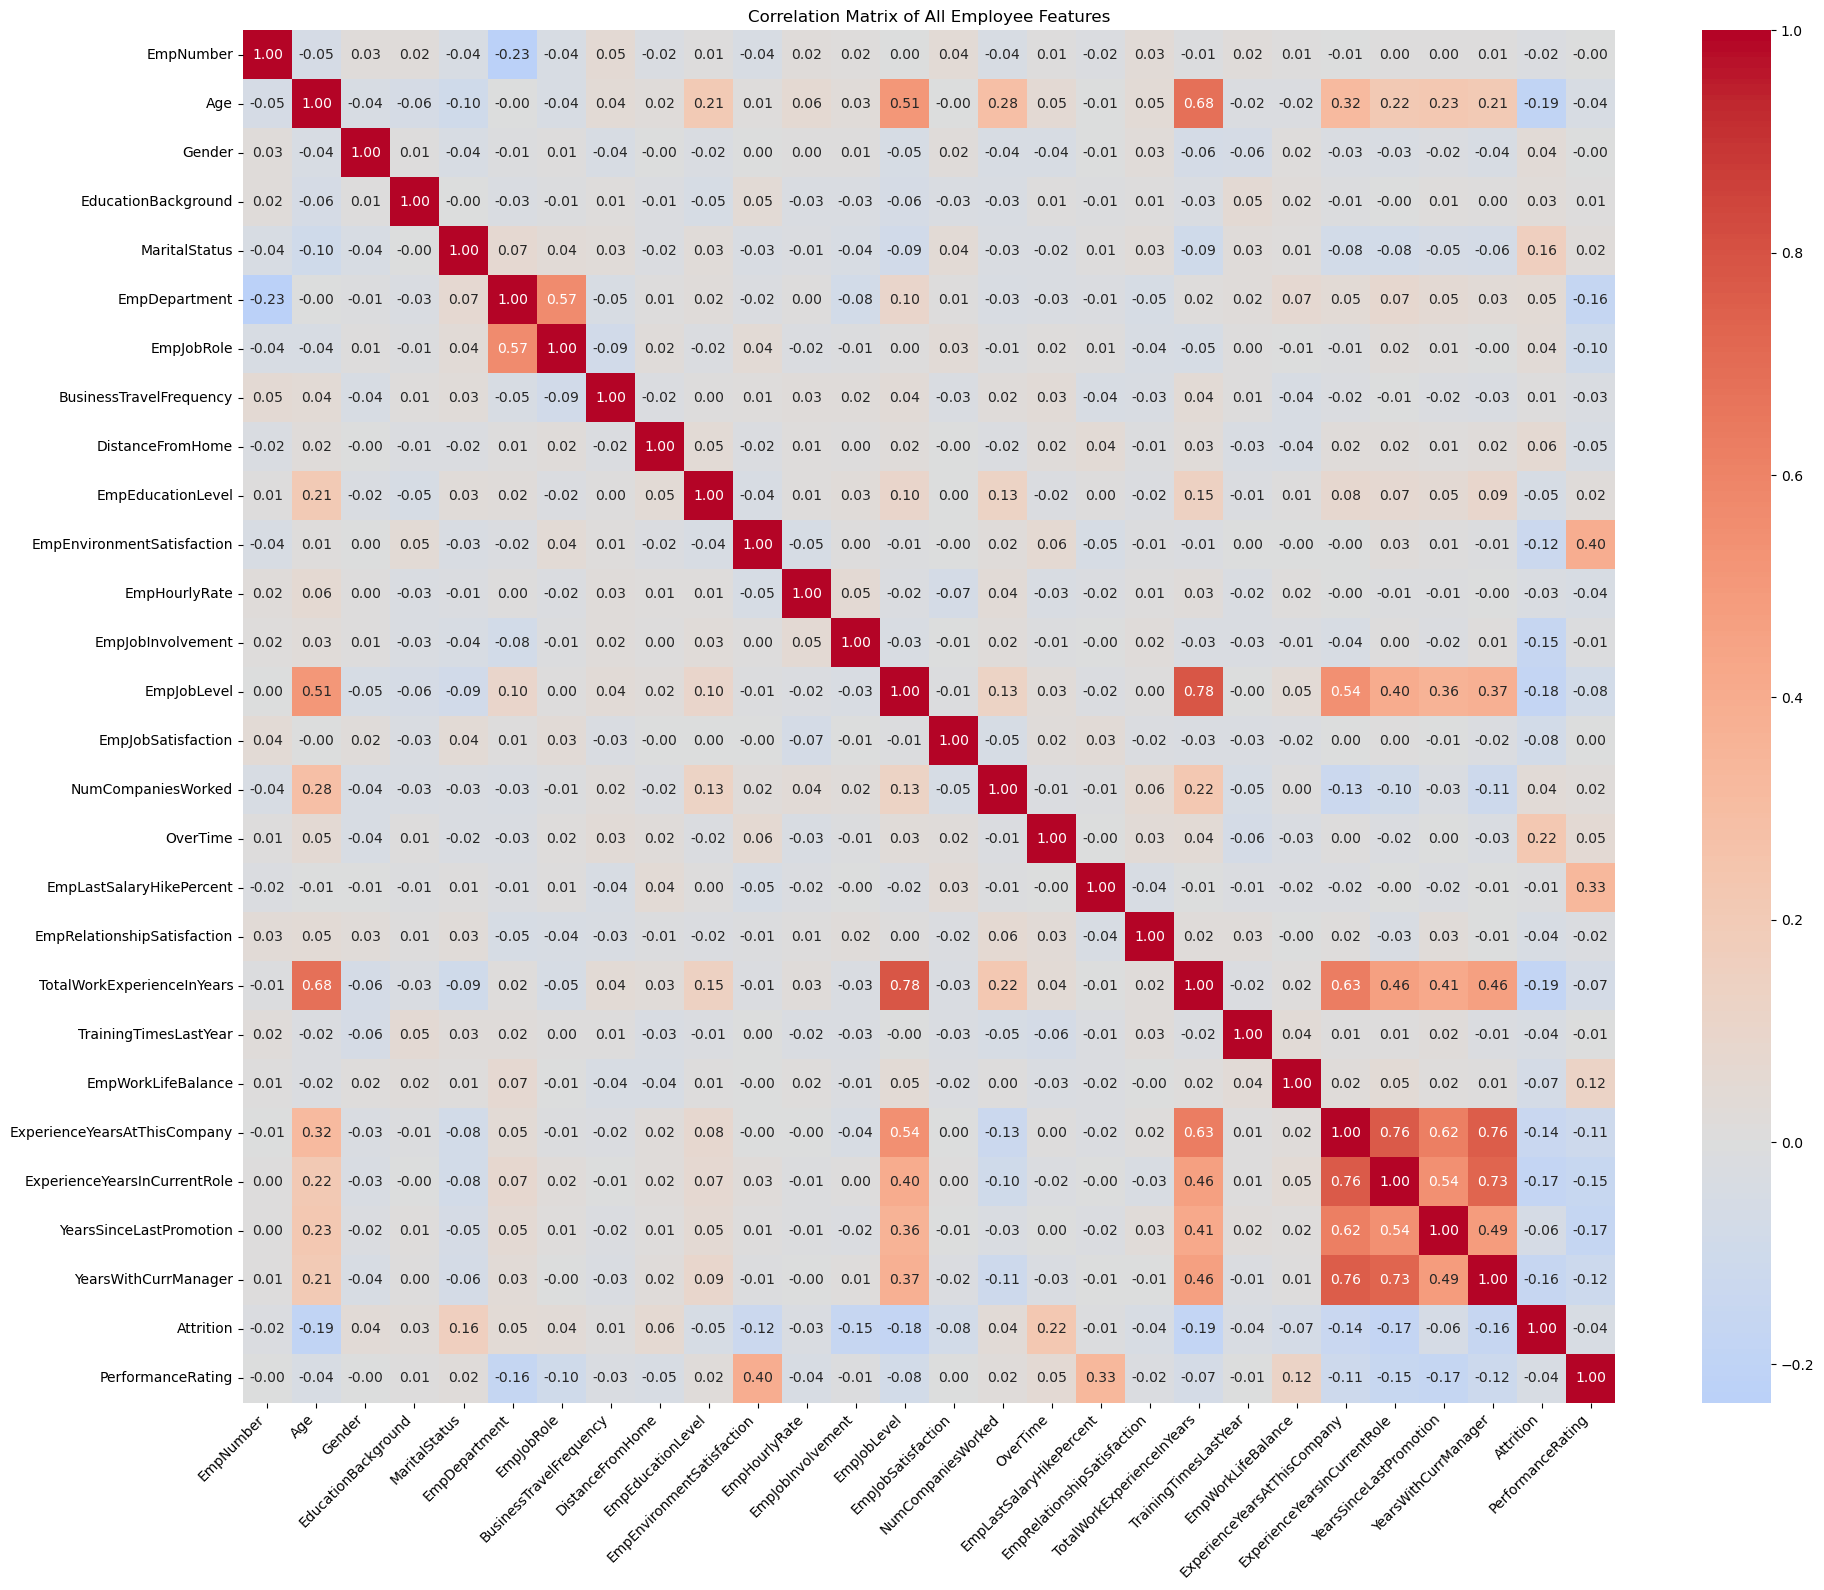

In [15]:
#Analysis to evaluate the correlation between features and variables:

# Create correlation matrix for all the features of the dataset
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))  # Increased size for better readability
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Round to 2 decimal places
            square=True)  # Make cells square

plt.title('Correlation Matrix of All Employee Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:

# To display the top 10 strongest correlations from the dataset

print("\nTop 10 Strongest Correlations:")
# Get upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Stack the correlations and sort by absolute value
strongest_correlations = upper.unstack()
strongest_correlations = strongest_correlations[strongest_correlations != 0].sort_values(key=abs, ascending=False)
print("__" *40)
strongest_correlations.head(10)


Top 10 Strongest Correlations:
________________________________________________________________________________


TotalWorkExperienceInYears    EmpJobLevel                     0.784229
ExperienceYearsInCurrentRole  ExperienceYearsAtThisCompany    0.764102
YearsWithCurrManager          ExperienceYearsAtThisCompany    0.759258
                              ExperienceYearsInCurrentRole    0.728973
TotalWorkExperienceInYears    Age                             0.680886
ExperienceYearsAtThisCompany  TotalWorkExperienceInYears      0.633555
YearsSinceLastPromotion       ExperienceYearsAtThisCompany    0.620230
EmpJobRole                    EmpDepartment                   0.568973
YearsSinceLastPromotion       ExperienceYearsInCurrentRole    0.540600
ExperienceYearsAtThisCompany  EmpJobLevel                     0.540377
dtype: float64

We'll proceed to get the important features using random forest tree based model which will give us the built-in feature importance.

In [17]:
#We shall split our encoded data into features and target variables. 

Features = df_encoded.drop('PerformanceRating', axis =1 )
Target = df['PerformanceRating'] #Target variable

Features.shape, Target.shape #Gets us the shapes of the target and feature variables

((1200, 27), (1200,))

In [18]:
# Get feature importance using the random forest classification model

rfc_model = RandomForestClassifier(random_state = 42)
rfc_model.fit(Features,Target)
feature_importance = pd.DataFrame({
    'Feature': Features.columns,
    'Importance': rfc_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Important Factors:")
print(feature_importance.head(15))


Top 15 Important Factors:
                         Feature  Importance
10    EmpEnvironmentSatisfaction    0.215963
17      EmpLastSalaryHikePercent    0.210612
24       YearsSinceLastPromotion    0.091408
0                      EmpNumber    0.055499
5                  EmpDepartment    0.037315
23  ExperienceYearsInCurrentRole    0.034389
11                 EmpHourlyRate    0.033654
6                     EmpJobRole    0.033612
22  ExperienceYearsAtThisCompany    0.030361
1                            Age    0.028494
21            EmpWorkLifeBalance    0.024224
8               DistanceFromHome    0.022955
25          YearsWithCurrManager    0.022656
19    TotalWorkExperienceInYears    0.021320
15            NumCompaniesWorked    0.017789


In [19]:
#Proceeding to determine the important features using the random forest regressor

# Train Random Forest for feature importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(Features, Target)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': Features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Important Factors:")
print(feature_importance.head(5))


Top 5 Important Factors:
                         Feature  Importance
17      EmpLastSalaryHikePercent    0.238267
10    EmpEnvironmentSatisfaction    0.213559
24       YearsSinceLastPromotion    0.191848
5                  EmpDepartment    0.065934
23  ExperienceYearsInCurrentRole    0.050800


The two results suggests that recent salary increases and workplace environment strongly correlate with and significantly impact performance with both over 20% influence.

The third factor is the number of years and employee has stayed since they were last promoted following with an impact of 13%.

## 3. Train a Prediction Model

I would be training four prediction models, evaluating the accuracy of each model and finally conduct an overral cross validation to evaluate the model performance.

In [21]:
X = df_encoded[['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent','YearsSinceLastPromotion','EmpDepartment','ExperienceYearsInCurrentRole',
                'EmpHourlyRate','EmpJobRole','ExperienceYearsAtThisCompany','Age','EmpWorkLifeBalance','YearsWithCurrManager',
                'TotalWorkExperienceInYears','DistanceFromHome', 'EducationBackground', 'EmpEducationLevel']]
y = df['PerformanceRating'] #Target variable

X.shape , y.shape #Getting the shape of the train and test sets

((1200, 15), (1200,))

In [22]:
# Train Prediction Model by determining the train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Displaying the shape of our train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 15), (240, 15), (960,), (240,))

## Random Forest Regression Model

Mostly suitable for continuous output of the target variable but we'll try and see how it suits our current data


Model Performance score:
R2 Score is: 0.78


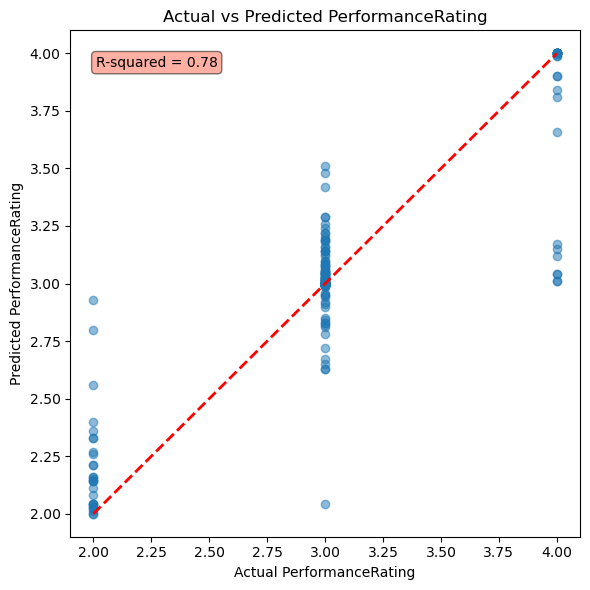

In [23]:

rf_model = RandomForestRegressor(random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\nModel Performance score:")
print(f"R2 Score is: {r2_score(y_test, y_pred):.2f}")

# Creating a scatter plot of actual vs predicted values for performance
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual PerformanceRating')
plt.ylabel('Predicted PerformanceRating')
plt.title('Actual vs Predicted PerformanceRating')

# Add a text box with R-squared value
r2 = rf_model.score(X_test, y_test)
plt.text(0.05, 0.95, f'R-squared = {r2:.2f}', transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='tomato', alpha=0.5))

plt.tight_layout()
plt.show()

## Random Forest Classification model

Will suit our data since or target variable is categorical. Let's review how it will perform on the data

Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.90      0.93        29
           3       0.95      0.99      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.97      0.88      0.92       240
weighted avg       0.96      0.95      0.95       240



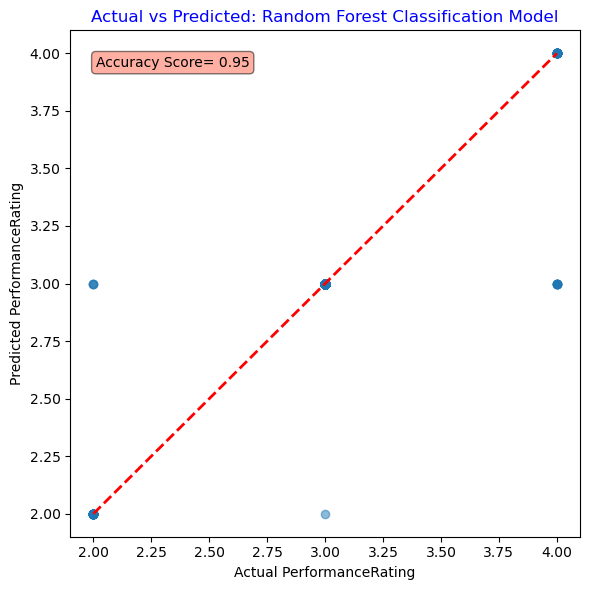

In [24]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)
y_pred_class = rfc_model.predict(X_test)

# Evaluate classification results
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

# Visualise the actual vs predicted values for performance with a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_class, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual PerformanceRating')
plt.ylabel('Predicted PerformanceRating')
plt.title('Actual vs Predicted: Random Forest Classification Model', color = 'blue')

# Add a text box with the Accuracy score value
acc_score = accuracy_score(y_test, y_pred_class)
plt.text(0.05, 0.95, f'Accuracy Score= {acc_score:.2f}', transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='tomato', alpha=0.5))

plt.tight_layout()
plt.show()

[[ 26   3   0]
 [  1 183   0]
 [  0   7  20]]


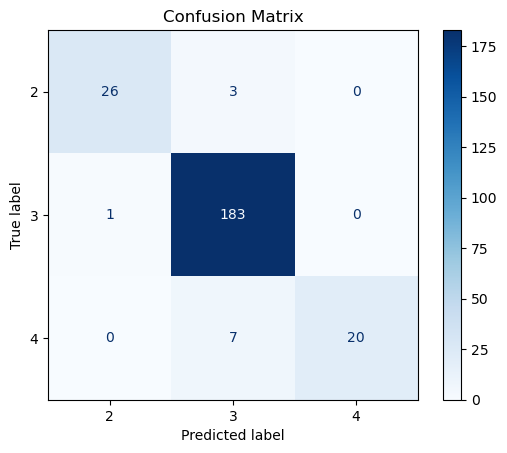

In [25]:
# Generate predictions

y_pred_class = rfc_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

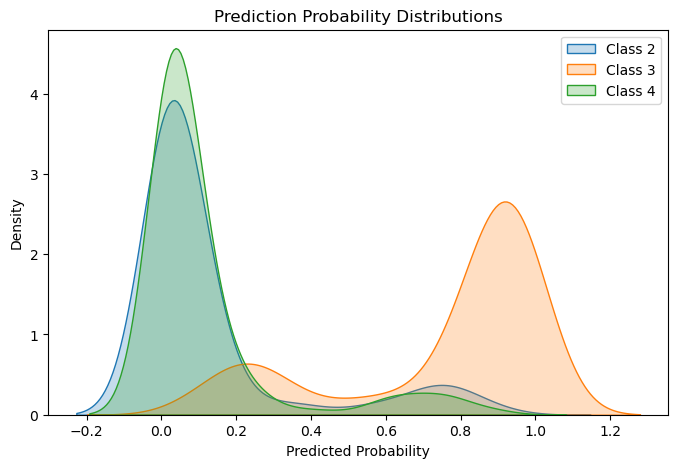

In [26]:
#Evaluating the prediction probabilities across the different classes of performance ratings

probs = rfc_model.predict_proba(X_test)
plt.figure(figsize=(8,5))
for i, class_label in enumerate(rfc_model.classes_):
    sns.kdeplot(probs[:, i], label=f'Class {class_label}', shade=True)
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.title("Prediction Probability Distributions")
plt.legend()
plt.show()

## LightGBM Classification model

Our third model to train our data on and evaluate its performance. Suitable for our classification task.


In [28]:
#X_train = X_train.loc[:, ~X_train.columns.duplicated()]

#print(X_train.columns[X_train.columns.duplicated()])

#Instantiate the lightGBM classifier
lclf = lgb.LGBMClassifier(n_estimators=100, verbosity=-1)
lclf.fit(X_train, y_train)

LGBMClassifier(verbosity=-1)

In [29]:
#predict on the training set
y_pred = lclf.predict(X_train)

# After we have trained the model, we can now go ahead and evaluate its accuracy
acc_score = accuracy_score(y_train, y_pred)
print(f'The accuracy score of the prediction on the train set is: {acc_score}')


#predict on the test set
y_pred_2= lclf.predict(X_test)

#Test the accuracy of the predictions sing the accuracy score metric
print(f'\n The accuracy of the test set is: \n', {accuracy_score(y_test, y_pred_2)} )

The accuracy score of the prediction on the train set is: 1.0

 The accuracy of the test set is: 
 {0.9541666666666667}


## Logistist Regression model



Our fourth experimental model is this one. This may not be a suitable model but worth giving it a try.

In [30]:
#Instantiate the Logistic regression model
lr = LogisticRegression()


#fit the model
lr.fit(X_train, y_train)

#Test the accuracy score
lr.score(X_test, y_test)

0.8

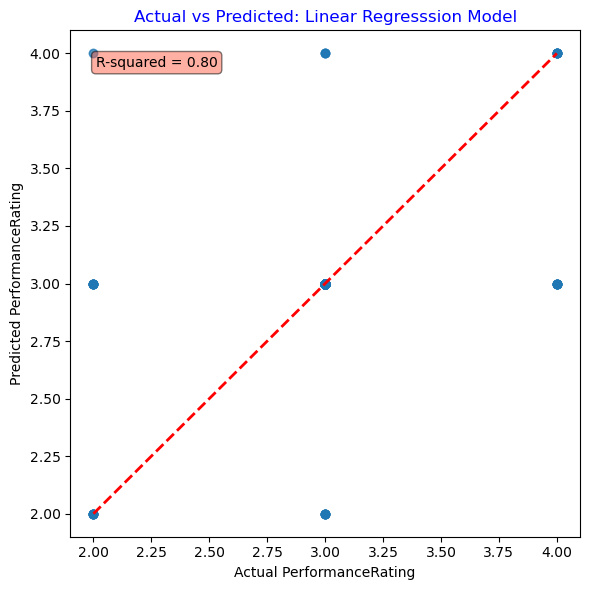

In [31]:
# Visualise the actual vs predicted values for performance with a scatter plot

#Presdiction on the test set
y_pred_lr = lr.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual PerformanceRating')
plt.ylabel('Predicted PerformanceRating')
plt.title('Actual vs Predicted: Linear Regresssion Model', color = 'blue')

# Add a text box with R-squared value
r2 = lr.score(X_test, y_test)
plt.text(0.05, 0.95, f'R-squared = {r2:.2f}', transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='tomato', alpha=0.5))

plt.tight_layout()
plt.show()

## Cross-validation Scores for Selecting the Robust Model

Cross-validation will help prevent overfitting for our seected model. It will ensure the model performs well on unseen data, and provides a better measure of how the model will perform in real-world scenarios.

## StratifiedKFold Cross Validation, 3 splits

In [32]:
#We shall use the StratifiedKFold with 3 splits for experimental design

skf = StratifiedKFold(n_splits = 3)


#We'll define a function that will take the model, train and test sets and return the model's score

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test, y_test)

get_score(lclf, X_train, X_test, y_train, y_test)

#Create empty lists of the various scores for our four models
scores_lr = [] #linear Regression score
scores_lclf = [] #lightGBM classifier score
scores_rfr = [] #Random Forest regression score
scores_rfc = [] #Random Forest classification score

for train_idx, test_idx in skf.split(X,y):
    X_train, X_test = X.loc[train_idx] , X.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]
    #Append the values gotten from executing the score function to the empty lists
    scores_lr.append(get_score(lr, X_train, X_test, y_train, y_test))
    scores_rfc.append(get_score(rfc_model, X_train, X_test, y_train, y_test))
    scores_rfr.append(get_score(rf_model, X_train, X_test, y_train, y_test))
    scores_lclf.append(get_score(lclf, X_train, X_test, y_train, y_test))

print(f'The Linear regression Model performance CV score is: {scores_lr}')
print(f'\nThe Random Forest Classification Model performance CV score is: {scores_rfc}')
print(f'\nThe LGBMClassification Model performance CV score is: {scores_lclf}')
print(f'\nThe Random Forest Regression Model performance CV score is: {scores_rfr}')


The Linear regression Model performance CV score is: [0.735, 0.7725, 0.785]

The Random Forest Classification Model performance CV score is: [0.94, 0.925, 0.9]

The LGBMClassification Model performance CV score is: [0.9275, 0.9225, 0.9025]

The Random Forest Regression Model performance CV score is: [0.7489691588785046, 0.7219703885632198, 0.6339702032021131]


## Evaluating the scores from the built-in cross validation function


This will increase the number of splits to a default 5. cross_val_score(model, X, y)

In [33]:
print(f'The Linear regression Model performance CV score is:')
print(cross_val_score(lr, X, y))

print(f'\nThe Random Forest Classification Model performance CV score is:')
print(cross_val_score(rfc_model, X, y))

print(f'\nThe Random Forest Regression Model performance CV score is:')
print(cross_val_score(rf_model, X, y))

print(f'\nThe LGBMClassification Model performance CV score is:')
print(cross_val_score(lclf, X, y))


The Linear regression Model performance CV score is:
[0.68333333 0.79583333 0.75416667 0.79583333 0.79166667]

The Random Forest Classification Model performance CV score is:
[0.9        0.95416667 0.98333333 0.91666667 0.90416667]

The Random Forest Regression Model performance CV score is:
[0.62940544 0.77802095 0.73186747 0.73980477 0.58923373]

The LGBMClassification Model performance CV score is:
[0.9125     0.92916667 0.97083333 0.91666667 0.90416667]


The Random Classification Model is the best model since it has better scores meaning that it will perform well on new data to the model.

We sall proceed and build our prediction web app usig this model.

In [34]:
import pickle
# Save the Random Forest classificassion model in a web binary machine readable format
pickle.dump(rfc_model, open('Staff Performance Analysis.pkl', 'wb'))

This line instantly creates a pickle file named Staff Performance Analysis upon execution.